**SHAP values exercise**

In [1]:
# load data
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


In [2]:
# columns
data.columns.value_counts()

time_in_hospital      1
diag_3_250            1
diag_3_276            1
diag_3_428            1
max_glu_serum_None    1
                     ..
diag_1_414            1
diag_1_786            1
diag_2_276            1
diag_2_428            1
readmitted            1
Length: 65, dtype: int64

In [3]:
# target
y = data['readmitted']

In [4]:
# features
base_features = [c for c in data.columns if c != 'readmitted']
X = data[base_features]

In [77]:
# train and validate data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [6]:
# create model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

In [9]:
# MEAN DECREASE IMPURITY
import numpy as np
importances = forest.feature_importances_
for name, importance in zip(base_features, importances):
  print(name, importance)
std = np.std(importances, axis=0)
print(f"\nStandard desviation {std:.4f}")

time_in_hospital 0.07627678251203852
num_lab_procedures 0.12137167986644357
num_procedures 0.052652880410169564
num_medications 0.1076797785252818
number_outpatient 0.023854611466956426
number_emergency 0.019030556236918246
number_inpatient 0.059061218038230785
number_diagnoses 0.05195271301899526
race_Caucasian 0.01648392270856534
race_AfricanAmerican 0.0139981757458831
gender_Female 0.025595833918214857
age_[70-80) 0.017878244109441277
age_[60-70) 0.016354729260443526
age_[50-60) 0.01346189253339915
age_[80-90) 0.015056987468097851
age_[40-50) 0.010221437984435453
payer_code_? 0.01936781942050825
payer_code_MC 0.01686757862148933
payer_code_HM 0.007763205586736425
payer_code_SP 0.00742099707440326
payer_code_BC 0.006808601682694749
medical_specialty_? 0.018796021835429277
medical_specialty_InternalMedicine 0.012990189484168885
medical_specialty_Emergency/Trauma 0.008716052943755435
medical_specialty_Family/GeneralPractice 0.01040023385083766
medical_specialty_Cardiology 0.00711592077

<Axes: >

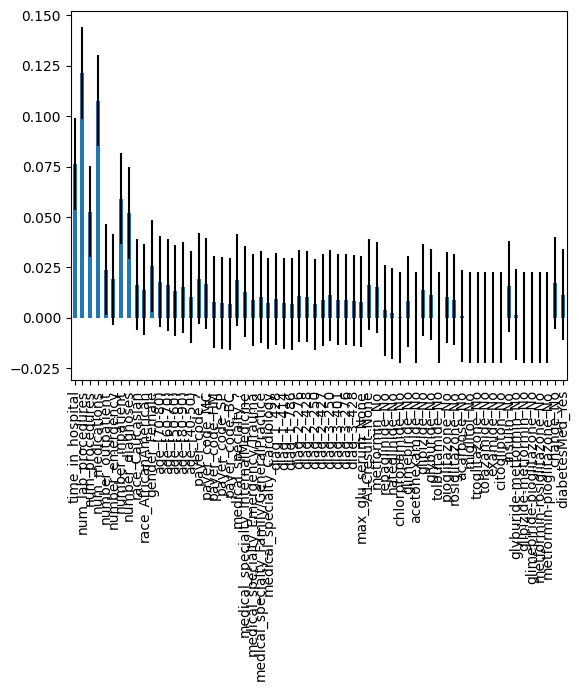

In [10]:
# plot importances
from matplotlib import pyplot as plt
importances_serie = pd.Series(importances, index=base_features)
fig, ax = plt.subplots()
importances_serie.plot.bar(yerr=std , ax=ax)


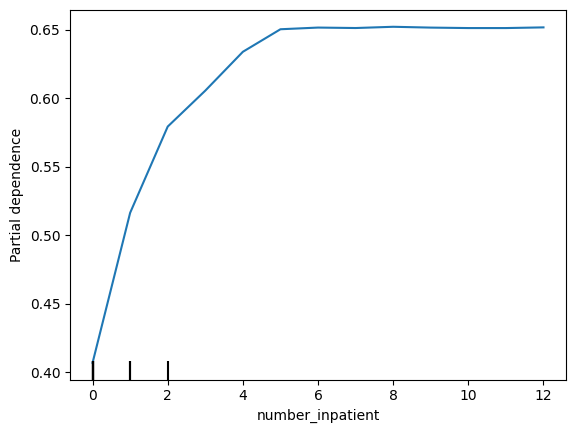

In [14]:
# How number_inpatient affects the model's predicitons? Partial Dependence Plot
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(forest, val_X, ['number_inpatient'])

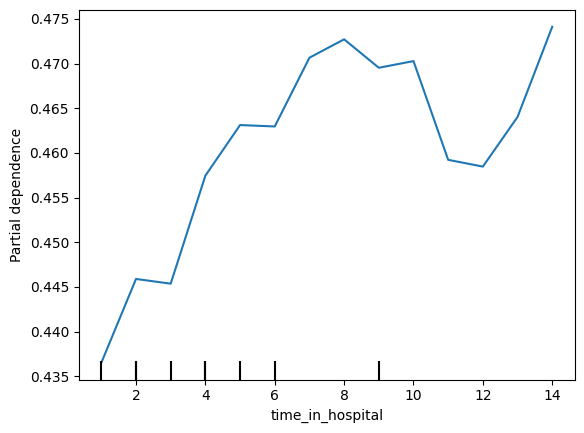

In [15]:
# Similar with time_in_hospital
PartialDependenceDisplay.from_estimator(forest, val_X, ['time_in_hospital'])

<Axes: xlabel='time_in_hospital'>

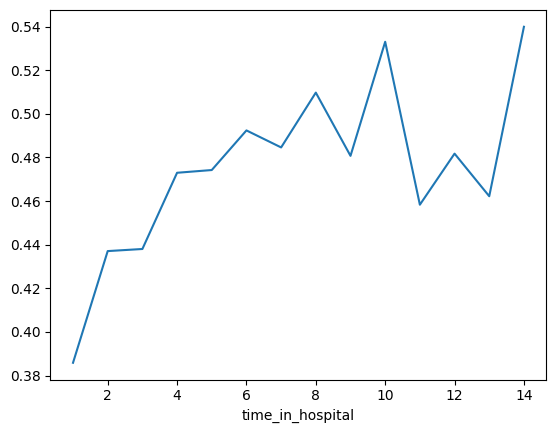

In [18]:
# Readmission rate for each value of time_in_hospital
aux_df = pd.concat([train_X, train_y], axis=1)
aux_df.groupby(['time_in_hospital']).mean().readmitted.plot()

In [78]:
# sample
sample = val_X.iloc[0]
sample

time_in_hospital                   2
num_lab_procedures                31
num_procedures                     4
num_medications                   19
number_outpatient                  0
                               ...  
glimepiride-pioglitazone_No     True
metformin-rosiglitazone_No      True
metformin-pioglitazone_No       True
change_No                      False
diabetesMed_Yes                 True
Name: 21492, Length: 64, dtype: object

In [19]:
# SHAP values for 1 prediction
import shap
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(sample)
print(shap_values)

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[[ 4.35045958e-02 -4.35045958e-02]
 [-7.96569928e-03  7.96569929e-03]
 [ 5.95309390e-02 -5.95309390e-02]
 [-2.85043052e-03  2.85043051e-03]
 [ 1.73322830e-02 -1.73322830e-02]
 [ 1.44392458e-02 -1.44392458e-02]
 [ 4.45388098e-02 -4.45388098e-02]
 [-2.95212642e-02  2.95212642e-02]
 [ 9.75538267e-04 -9.75538267e-04]
 [ 3.72917012e-03 -3.72917013e-03]
 [ 7.24606899e-03 -7.24606900e-03]
 [ 1.04113762e-02 -1.04113762e-02]
 [-2.23618221e-02  2.23618221e-02]
 [-1.73122584e-03  1.73122584e-03]
 [ 5.29129849e-03 -5.29129849e-03]
 [ 4.82139872e-04 -4.82139873e-04]
 [ 1.01606254e-02 -1.01606254e-02]
 [ 3.49405556e-05 -3.49405517e-05]
 [ 1.72062598e-03 -1.72062598e-03]
 [ 1.98478732e-03 -1.98478732e-03]
 [-1.28585092e-03  1.28585092e-03]
 [ 1.90775310e-02 -1.90775310e-02]
 [ 3.05758860e-04 -3.05758861e-04]
 [ 5.49431429e-03 -5.49431429e-03]
 [ 2.02555412e-03 -2.02555412e-03]
 [ 1.18604320e-03 -1.18604320e-03]
 [ 3.93668312e-03 -3.93668312e-03]
 [ 7.45672484e-04 -7.45672484e-04]
 [ 1.11835234e-03 -1

In [21]:
# Predict target for sample
predict = forest.predict([sample])
print(predict)

[0]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [108]:
# Explanation
from pydoc import doc


explanation = explainer(sample, predict)
doc(explanation)


Python Library Documentation: Explanation in module shap._explanation object

class Explanation(builtins.object)
 |  Explanation(values, base_values=None, data=None, display_data=None, instance_names=None, feature_names=None, output_names=None, output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
 |  
 |  A sliceable set of parallel arrays representing a SHAP explanation.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __copy__(self)
 |  
 |  __getitem__(self, item)
 |      This adds support for OpChain indexing.
 |  
 |  __init__(self, values, base_values=None, data=None, display_data=None, instance_names=None, feature_names=None, output_names=None, output_indexes=None, lower_bounds=None, upper_bounds=None, error_std=None, main_effects=None, hierarchical_values=None, clustering=None, compute_time=None)
 |      Initialize self.  See help(type(self)) for accurate 

In [73]:
explainer.expected_value

array([0.54615644, 0.45384356])

In [106]:
# shap_values ordenados (-,+) con valores superiores al 5 por mil
shap_values_relevants = [[-abs(fila[0]), abs(fila[1])] for fila in shap_values if (abs(fila[0] > 0.005))]
shap_values.shape

(64, 2)

In [105]:
shap_values.shape

(64, 2)

In [104]:
# plot explanation
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[0])